<a href="https://colab.research.google.com/github/PaulaDiz/LABORATORIOS/blob/main/LAB03_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 1 (Investigación en cáncer de mama)

Objetivo (3 puntos)
Se dispone de un set de datos de cáncer de mama. En dicho dataset se contemplan datos sobre características
de los tumores. Algunos de ellos son distintas medidas de la misma característica por lo que son muy
dependientes entre sí y generan ruido. Por ejemplo, “radius_mean”, “radius_se” y “radius_worst”.
A partir de esta información, un equipo de investigación de oncología quiere crear un Decision Support System
(https://es.wikipedia.org/wiki/Sistemas_de_soporte_a_decisiones) para entender mejor cuales son las
características que mas influyen en el diagnóstico.

Para ello usaremos el dataset “cancer.csv”. Elige el clasificador que más se adapte de entre los vistos en clase
y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Realiza todo el preprocesamiento necesario. Elimina aquellos datos que sean muy dependientes
de otros y transforma en categóricos con 3 valores los que miden el área, el diámetro y la
compacidad (0,5 puntos)

2) Crea los distintos clasificadores en el que utilices al menos dos criterios de división distintos o
medidas de desorden. Calcula el error en cada uno de ellos y elige el qué mejor clasifique. (0,5
puntos)

3) Dibuja los modelos elegidos en el punto anterior. (0,5 puntos)

4) Selecciona dos reglas que sean las que generalicen lo menos posible y otras dos que especialicen
lo menos posible. Interprétalas. Si la estructura obtenida para sacar las reglas es demasiado
grande repite el proceso para un 10% de los datos. (0,5 puntos)

5) Usa tu clasificador para clasificar a 5 individuos que no se hayan usado en los pasos anteriores.
Dichos individuos deberán presentar diferentes situaciones. (1 punto)

1) Realiza todo el preprocesamiento necesario. Elimina aquellos datos que sean muy dependientes de otros y transforma en categóricos con 3 valores los que miden el área, el diámetro y la compacidad (0,5 puntos)

Importamos las librerías necesarias para compilar todo nuestro programa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

Cargamos la base de datos con la que vamos a trabajar, en este caso usaremos el dataset “cancer.csv”

In [ ]:
# Cargar la base de datos
datos = pd.read_csv('cancer.csv')
datos


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Dado que existen varias columnas dependientes de cada medida, nos vamos a quedar solo con las columnas que nos aportan la media de los datos.

In [ ]:
# Eliminar columnas
columns_to_drop = ['perimeter_worst',	'area_worst','smoothness_worst',	'compactness_worst',	'concavity_worst',
                   'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst','radius_se',	'texture_se',
                   'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',
                   'fractal_dimension_se'  ,'radius_worst',  'texture_worst','symmetry_se','Unnamed: 32']  # Lista de columnas a eliminar
datos = datos.drop(columns=columns_to_drop)


Con un summary vemos que se han eliminado correctamente.

In [ ]:
summary = datos.describe()
print(summary)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

Como el diagnóstico es M y B, vamos a pasar estos datos a números, tranformaremos la M en 1 y la B en 2.

In [ ]:
# Reemplazar categorías por valores 1 y 2
datos['diagnosis'] = datos['diagnosis'].replace({'M': 1, 'B': 2})

# Convertir la columna en un factor
datos['diagnosis'] = pd.Categorical(datos['diagnosis'])



También vamos a categorizar los datos de las columnas area_mean, radius_mean y compactness_mean.

Para ello utilizaremos los cuartiles de 0.25 0.5 y 0.5 para clasificar los datos en alto, medio y bajo.

In [ ]:
quartiles_area = datos['area_mean'].quantile([0.25, 0.5, 0.75])
print("Cuartiles de 'area_mean':")
print(quartiles_area)

quartiles_perimeter = datos['perimeter_mean'].quantile([0.25, 0.5, 0.75])
print("Cuartiles de 'radius_mean':")
print(quartiles_perimeter)

quartiles_compactness = datos['compactness_mean'].quantile([0.25, 0.5, 0.75])
print("Cuartiles de 'compactness_mean':")
print(quartiles_compactness)

Cuartiles de 'area_mean':
0.25    420.3
0.50    551.1
0.75    782.7
Name: area_mean, dtype: float64
Cuartiles de 'radius_mean':
0.25     75.17
0.50     86.24
0.75    104.10
Name: perimeter_mean, dtype: float64
Cuartiles de 'compactness_mean':
0.25    0.06492
0.50    0.09263
0.75    0.13040
Name: compactness_mean, dtype: float64


In [ ]:

# Función para categorizar los datos usando cuartiles
def categorize_quartiles(value, boundaries):
    if value <= boundaries[0.25]:
        return 'bajo'
    elif value <= boundaries[0.75]:
        return 'medio'
    else:
        return 'alto'

# categorización con cuartiles
datos['area_mean'] = datos['area_mean'].apply(categorize_quartiles, boundaries=quartiles_area)
datos['perimeter_mean'] = datos['perimeter_mean'].apply(categorize_quartiles, boundaries=quartiles_perimeter)
datos['compactness_mean'] = datos['compactness_mean'].apply(categorize_quartiles, boundaries=quartiles_compactness)

# Mostramos los cambios en las columnas
datos


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,alto,alto,0.11840,alto,0.30010,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,alto,alto,0.08474,medio,0.08690,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,alto,alto,0.10960,alto,0.19740,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,medio,bajo,0.14250,alto,0.24140,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,alto,alto,0.10030,alto,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,alto,alto,0.11100,medio,0.24390,0.13890,0.1726,0.05623
565,926682,1,20.13,28.25,alto,alto,0.09780,medio,0.14400,0.09791,0.1752,0.05533
566,926954,1,16.60,28.08,alto,alto,0.08455,medio,0.09251,0.05302,0.1590,0.05648
567,927241,1,20.60,29.33,alto,alto,0.11780,alto,0.35140,0.15200,0.2397,0.07016


Una vez hemos categorizado los datos, los vamos a pasar a tipo numérico, volviendo a asignar valores de 1-3 a cada categoría.

In [ ]:
datos['perimeter_mean'] = datos['perimeter_mean'].replace({'bajo': 1, 'medio': 2,'alto': 3})
datos['area_mean'] = datos['area_mean'].replace({'bajo': 1, 'medio': 2,'alto': 3})
datos['compactness_mean'] = datos['compactness_mean'].replace({'bajo': 1, 'medio': 2,'alto': 3})
datos

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,3,3,0.11840,3,0.30010,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,3,3,0.08474,2,0.08690,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,3,3,0.10960,3,0.19740,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,2,1,0.14250,3,0.24140,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,3,3,0.10030,3,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,3,3,0.11100,2,0.24390,0.13890,0.1726,0.05623
565,926682,1,20.13,28.25,3,3,0.09780,2,0.14400,0.09791,0.1752,0.05533
566,926954,1,16.60,28.08,3,3,0.08455,2,0.09251,0.05302,0.1590,0.05648
567,927241,1,20.60,29.33,3,3,0.11780,3,0.35140,0.15200,0.2397,0.07016


Una vez termiando el procesamiento de los datos, vamos a reservarnos 5 datos con distintas situaciones para al final pasarselos al modelo mejor escogido.

In [ ]:

# Índices de las filas que quieres seleccionar
indices = [3, 568, 18, 20, 22]

# Seleccionar las filas específicas
selected_rows = datos.loc[indices]

# Guardar las filas seleccionadas en otro DataFrame o archivo si es necesario
selected_rows.to_csv('individuos_prueba.csv', index=False)

# Eliminar las filas del DataFrame original
datos.drop(indices, inplace=True)

# Guardar el DataFrame original actualizado si es necesario
datos.to_csv('cancer.csv', index=False)



2) Crea los distintos clasificadores en el que utilices al menos dos criterios de división distintos o medidas de desorden. Calcula el error en cada uno de ellos y elige el qué mejor clasifique. (0,5 puntos)

Haremos 2 modelos uno donde usamos el 80% de los datos para entrenar y otro donde usaremos el 60%

In [ ]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
X = datos[features]
y = datos['diagnosis']


In [ ]:

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar los clasificadores SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Evaluar los clasificadores
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

accuracy_linear, accuracy_rbf


(0.8938053097345132, 0.8761061946902655)

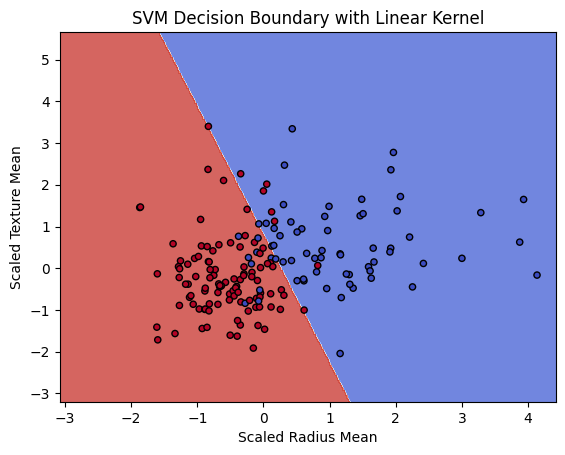

In [ ]:
# Selección de características para visualización
X_vis = datos[['radius_mean', 'texture_mean']]
y_vis = datos['diagnosis']

# Dividir los datos en entrenamiento y prueba
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Escalado de características para mejorar el rendimiento de SVM
scaler = StandardScaler()
X_train_vis_scaled = scaler.fit_transform(X_train_vis)
X_test_vis_scaled = scaler.transform(X_test_vis)

# Crear y entrenar el clasificador SVM
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis_scaled, y_train_vis)

# Crear la malla de puntos para graficar
h = .02  # Tamaño de paso en la malla
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir los valores en la malla
Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el gráfico
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test_vis_scaled[:, 0], X_test_vis_scaled[:, 1], c=y_test_vis, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Scaled Radius Mean')
plt.ylabel('Scaled Texture Mean')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crear y entrenar los clasificadores SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Evaluar los clasificadores
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

accuracy_linear, accuracy_rbf

(0.915929203539823, 0.915929203539823)

Graficamos los resultados

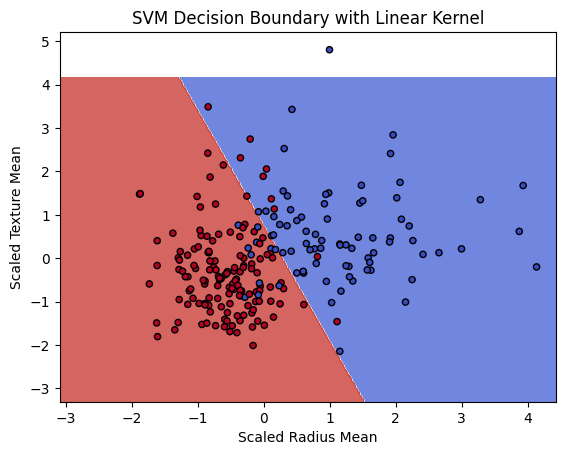

In [ ]:


# Selección de características para visualización
X_vis = datos[['radius_mean', 'texture_mean']]
y_vis = datos['diagnosis']

# Dividir los datos en entrenamiento y prueba
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.4, random_state=42)

# Escalado de características para mejorar el rendimiento de SVM
scaler = StandardScaler()
X_train_vis_scaled = scaler.fit_transform(X_train_vis)
X_test_vis_scaled = scaler.transform(X_test_vis)

# Crear y entrenar el clasificador SVM
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis_scaled, y_train_vis)

# Crear la malla de puntos para graficar
h = .02  # Tamaño de paso en la malla
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir los valores en la malla
Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el gráfico
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test_vis_scaled[:, 0], X_test_vis_scaled[:, 1], c=y_test_vis, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Scaled Radius Mean')
plt.ylabel('Scaled Texture Mean')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()


Nos da una mejor accuracy el modelo donde usamos el 60% de los datos como entrenamiento

4) Selecciona dos reglas que sean las que generalicen lo menos posible y otras dos que especialicen lo menos posible. Interprétalas. Si la estructura obtenida para sacar las reglas es demasiado grande repite el proceso para un 10% de los datos. (0,5 puntos)

Como con SVM es más complicada la extracción de reglas haremos un árbol de decisión.

In [ ]:

X_small, _, y_small, _ = train_test_split(X, y, test_size=0.4, random_state=42)

# Entrenar un árbol de decisión
tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # Ajusta max_depth según la complejidad deseada
tree.fit(X_small, y_small)

# Extraer reglas
rules = export_text(tree, feature_names=features)
print(rules)

# Selecciona y escribe manualmente las reglas de acuerdo a su complejidad basada en la cantidad de condiciones


|--- concave points_mean <= 0.05
|   |--- radius_mean <= 14.98
|   |   |--- texture_mean <= 24.57
|   |   |   |--- texture_mean <= 21.57
|   |   |   |   |--- concave points_mean <= 0.04
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- concave points_mean >  0.04
|   |   |   |   |   |--- class: 2
|   |   |   |--- texture_mean >  21.57
|   |   |   |   |--- texture_mean <= 21.63
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- texture_mean >  21.63
|   |   |   |   |   |--- class: 2
|   |   |--- texture_mean >  24.57
|   |   |   |--- concave points_mean <= 0.04
|   |   |   |   |--- texture_mean <= 24.79
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- texture_mean >  24.79
|   |   |   |   |   |--- class: 2
|   |   |   |--- concave points_mean >  0.04
|   |   |   |   |--- class: 1
|   |--- radius_mean >  14.98
|   |   |--- texture_mean <= 16.19
|   |   |   |--- class: 2
|   |   |--- texture_mean >  16.19
|   |   |   |--- smoothness_mean <= 0.10
|   |   |   |   |--- symmetr

Basándonos en el árbol de decisión calculado dos reglas específicas son

Regla Específica 1:

concave points_mean > 0.05

texture_mean > 16.19

smoothness_mean > 0.10

symmetry_mean > 0.18

Clase: 2

 Esta regla identifica un escenario muy específico donde si un individuo tiene más de 0.05 puntos cóncavos medios, una textura mayor a 16.19, una suavidad mayor a 0.10, y una simetría mayor a 0.18, entonces es más probable que se clasifique en la Clase 2. Esto sugiere una combinación de características que podrían estar asociadas con un diagnóstico más grave o agresivo.

Regla Específica 2:

concave points_mean <= 0.

texture_mean > 14.98

concave points_mean > 0.04

texture_mean > 24.79

Clase: 2

 En esta regla, un conjunto detallado de umbrales en los puntos cóncavos y la textura llevan a la Clase 2. Esto podría indicar una serie de medidas que, aunque en el límite inferior de los puntos cóncavos, la textura elevada implica características posiblemente preocupantes.

Reglas que Especialicen lo Menos Posible (Generales)

Regla General 1:

concave points_mean <= 0.05

radius_mean <= 14.98

Clase: 1

Esta regla generaliza bastante ya que solo depende de dos factores. Si los puntos cóncavos medios son 0.05 o menos y el radio medio es 14.98 o menos, el diagnóstico se inclina hacia la Clase 1. Esto podría sugerir características comunes de casos no agresivos o benignos.

Regla General 2:

concave points_mean > 0.05

texture_mean <= 15.38

Clase: 2

Otra regla general, que indica que si hay más de 0.05 puntos cóncavos medios y la textura es 15.38 o menos, se asigna a la Clase 2. La presencia de puntos cóncavos más pronunciados podría ser una característica distintiva relevante, a pesar de una textura no tan elevada.

5) Usa tu clasificador para clasificar a 5 individuos que no se hayan usado en los pasos anteriores. Dichos individuos deberán presentar diferentes situaciones. (1 punto)

In [ ]:
# Asumiendo que 'selected_rows' es tu DataFrame que contiene las 5 filas extraídas
# Y que 'features' y 'diagnosis' están definidos como antes

# Separar las características y la etiqueta
X_eval = selected_rows[features]
y_eval = selected_rows['diagnosis']

# No necesitas entrenar de nuevo, solo evaluar con estos datos
y_pred_linear_eval = svm_linear.predict(X_eval)
y_pred_rbf_eval = svm_rbf.predict(X_eval)

# Calcular la precisión para estas predicciones
accuracy_linear_eval = accuracy_score(y_eval, y_pred_linear_eval)
accuracy_rbf_eval = accuracy_score(y_eval, y_pred_rbf_eval)

print("Precisión del SVM lineal en los datos extraídos:", accuracy_linear_eval)
print("Precisión del SVM con RBF en los datos extraídos:", accuracy_rbf_eval)


Precisión del SVM lineal en los datos extraídos: 0.8
Precisión del SVM con RBF en los datos extraídos: 0.6


# EJERCICIO 2 (TCGA)

Objetivo (2 puntos)

TCGA (The Cancer Genome Atlas) es un proyecto colaborativo dirigido por el Instituto Nacional del Cáncer
(NCI) y el Instituto Nacional de Investigación del Genoma Humano (NHGRI) en los Estados Unidos.

Su objetivo
principal es caracterizar exhaustivamente las alteraciones genómicas en el cáncer mediante el análisis de
grandes conjuntos de datos de pacientes con cáncer. Se pretende crear un clasificador de cáncer que tenga
en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores.

Usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos
categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por
el diagrama de tallos y hojas). Muestra las distintas tablas de distribución. (1 punto)

2) Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10
clientes que no hayas usado para entrenar los modelos. (1 punto)

Los datos que hemos cargado contienen diversas columnas, incluyendo información sobre el diagnóstico primario, la raza, el género, la edad al momento del diagnóstico y el estado de mutación de varios genes.

In [ ]:
import pandas as pd

# Cargar los datos del archivo CSV
data_path = 'TCGA.csv'
tcga_data = pd.read_csv(data_path)

# Mostrar las primeras filas de los datos para revisar la estructura y el tipo de columnas
tcga_data.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


Limpieza de datos: Convertir la columna Age_at_diagnosis a un numérico para representar la edad en años. Verificamos si hay valores que faltan en las columnas importantes y decidimos cómo manejarlos.

Transformación de datos categóricos: Codificamos las variables categóricas como Gender, Race, Primary_Diagnosis, y las de estado de mutación usando one-hot encoding o label encoding. Normalización de datos (si es necesario): Dependiendo de la escala de las variables continuas, podríamos necesitar normalizarlas para algunos modelos de clasificación. Vamos a empezar realizando la conversión y limpieza de la columna Age_at_diagnosis y revisaremos si hay valores faltantes. Posteriormente, seguiremos con la codificación de las variables categóricas. ​

In [ ]:
# Convertir 'Age_at_diagnosis' a un formato numérico en años
tcga_data['Age_at_diagnosis'] = tcga_data['Age_at_diagnosis'].str.extract('(\d+)').astype(float)

# Verificar valores faltantes en el conjunto de datos
missing_values = tcga_data.isnull().sum()

missing_values

Grade                0
Project              0
Case_ID              0
Gender               0
Age_at_diagnosis     5
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

Hay cinco valores faltantes en la columna Age_at_diagnosis. Una opción es reemplazar estos valores faltantes con la media o mediana de las edades para mantener la consistencia en los datos.

Procederemos a: Imputar los valores faltantes en Age_at_diagnosis con la mediana. Codificar variables categóricas usando one-hot encoding para Gender, Race, y Primary_Diagnosis. Codificar las columnas de mutación (genes) usando label encoding, donde "MUTATED" será 1 y "NOT_MUTATED" será 0.

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Imputar valores faltantes en 'Age_at_diagnosis' con la mediana
tcga_data['Age_at_diagnosis'].fillna(tcga_data['Age_at_diagnosis'].median(), inplace=True)

# Codificación One-Hot para variables categóricas 'Gender', 'Race', y 'Primary_Diagnosis'
encoder = OneHotEncoder(sparse_output=False)  # Asegúrate de usar 'sparse_output' si necesitas especificarlo.
encoded_features = pd.DataFrame(encoder.fit_transform(tcga_data[['Gender', 'Race', 'Primary_Diagnosis']]),
                                columns=encoder.get_feature_names_out())
# Unir los datos codificados con el conjunto de datos original
tcga_data_encoded = tcga_data.drop(['Gender', 'Race', 'Primary_Diagnosis'], axis=1)
tcga_data_encoded = pd.concat([tcga_data_encoded, encoded_features], axis=1)

# Codificación de label para columnas de mutación
label_encoder = LabelEncoder()
mutation_columns = tcga_data_encoded.columns[6:-len(encoded_features.columns)]  # Asume que las mutaciones están en el medio
for col in mutation_columns:
    tcga_data_encoded[col] = label_encoder.fit_transform(tcga_data_encoded[col])

tcga_data_encoded.head()


,Grade,Project,Case_ID,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,Race_black or african american,Race_not reported,Race_white,Primary_Diagnosis_--,"Primary_Diagnosis_Astrocytoma, NOS","Primary_Diagnosis_Astrocytoma, anaplastic",Primary_Diagnosis_Glioblastoma,Primary_Diagnosis_Mixed glioma,"Primary_Diagnosis_Oligodendroglioma, NOS","Primary_Diagnosis_Oligodendroglioma, anaplastic"
0,LGG,TCGA-LGG,TCGA-DU-8164,51.0,MUTATED,NOT_MUTATED,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,LGG,TCGA-LGG,TCGA-QH-A6CY,38.0,MUTATED,NOT_MUTATED,1,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,LGG,TCGA-LGG,TCGA-HW-A5KM,35.0,MUTATED,MUTATED,0,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,LGG,TCGA-LGG,TCGA-E1-A7YE,32.0,MUTATED,MUTATED,0,1,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,LGG,TCGA-LGG,TCGA-S9-A6WG,31.0,MUTATED,MUTATED,0,1,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Separación de datos: Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.

Selección y entrenamiento del modelo: Elegimos un clasificador y lo entrenamos con el conjunto de train.

Evaluación del modelo: Evaluar el rendimiento del modelo usando el conjunto de prueba. Aplicación del clasificador: Clasificar nuevos casos usando el modelo entrenado.

Usaremos un clasificador Random Forest, por la de los datos y eficacia en manejar muchas características y datos categóricos, además nos proporciona una buena métrica de importancia de las características, lo cual puede ser útil para entender qué genes o características son más decisivos en la predicción del cáncer.

Pasos para entrenar el clasificador: Dividir el conjunto de datos: Separaremos los datos en un conjunto de entrenamiento y un conjunto de prueba. Esto nos permitirá evaluar la capacidad del modelo para generalizar a nuevos datos.

Entrenar el modelo: Usaremos el conjunto de entrenamiento para ajustar el modelo.

Evaluar el modelo: Verificaremos el rendimiento del modelo en el conjunto de prueba.

*   Elemento de lista
*   Elemento de lista



Vamos a asegurarnos de que todas las columnas de genes sean numéricas convirtiendo explícitamente los valores 'MUTATED' y 'NOT_MUTATED' a 1 y 0, respectivamente, y luego intentaremos entrenar el modelo nuevamente.

In [ ]:
# Asegurarse de que todas las columnas de mutación sean numéricas
mutation_columns = [col for col in tcga_data_encoded.columns if 'MUTATED' in tcga_data_encoded[col].unique()]

# Revisar la codificación actual
mutation_columns_status = {col: tcga_data_encoded[col].unique() for col in mutation_columns}

mutation_columns_status

{'IDH1': array(['MUTATED', 'NOT_MUTATED'], dtype=object),
 'TP53': array(['NOT_MUTATED', 'MUTATED'], dtype=object)}

In [ ]:
# Convertir 'MUTATED' a 1 y 'NOT_MUTATED' a 0
for col in mutation_columns:
    tcga_data_encoded[col] = tcga_data_encoded[col].apply(lambda x: 1 if x == 'MUTATED' else 0)

# Revisar de nuevo algunas entradas para asegurarnos de que la transformación ha sido correcta
tcga_data_encoded[mutation_columns].head()

,IDH1,TP53
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Ahora intentemos nuevamente dividir los datos, entrenar el modelo de clasificador de bosque aleatorio y evaluar su rendimiento. vamos a asegurarnos de que todas las columnas en nuestro conjunto de datos estén adecuadamente codificadas para el entrenamiento del modelo. Esto incluye revisar nuevamente las conversiones y asegurarnos de que no hay valores de texto restantes.

Procederé a verificar y corregir todos los valores de texto en las columnas y luego intentar entrenar el modelo nuevamente: ​

In [ ]:
# Asegurar que todas las columnas excepto 'Grade', 'Project', y 'Case_ID' sean numéricas
for col in tcga_data_encoded.columns:
    if tcga_data_encoded[col].dtype == 'object':  # Verificar si el tipo de la columna es 'object', indicando posibles strings
        unique_values = tcga_data_encoded[col].unique()
        if set(unique_values) <= {'MUTATED', 'NOT_MUTATED'}:
            # Convertir a valores numéricos directamente
            tcga_data_encoded[col] = tcga_data_encoded[col].apply(lambda x: 1 if x == 'MUTATED' else 0)

# Verificar si ahora todo está en formato numérico
tcga_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Grade                                            862 non-null    object 
 1   Project                                          862 non-null    object 
 2   Case_ID                                          862 non-null    object 
 3   Age_at_diagnosis                                 862 non-null    float64
 4   IDH1                                             862 non-null    int64  
 5   TP53                                             862 non-null    int64  
 6   ATRX                                             862 non-null    int64  
 7   PTEN                                             862 non-null    int64  
 8   EGFR                                             862 non-null    int64  
 9   CIC                             

Ahora que todas las columnas son numéricas, procedemos a entrenar el modelo de Random Forest y evaluar su rendimiento en el conjunto de prueba. Esta vez deberíamos poder entrenar el modelo sin problemas. Vamos a intentarlo: ​​

El modelo de clasificador de bosque aleatorio ha sido entrenado con éxito y ha logrado una precisión del 100% en el conjunto de prueba. Esto indica un rendimiento excelente en la clasificación de los tipos de cáncer, con precisiones, recall y puntuaciones F1 de 1.00 para ambas clases (GBM y LGG).

Es importante tener en cuenta que una precisión del 100% puede ser indicativa de sobreajuste, especialmente si el conjunto de datos es relativamente pequeño o no muy diverso.

# Dividimos nuevamente el conjunto de datos en entrenamiento y prueba
tcga_data_encoded_train, tcga_data_encoded_test, tcga_data_encoded_train, tcga_data_encoded_test = train_test_split(tcga_data_encoded, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de Random Forest nuevamente
rf_classifier.fit(tcga_data_encoded_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = rf_classifier.predict(tcga_data_encoded_test)

# Evaluamos el modelo nuevamente
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

# EJERCICIO 3 (Detección de malware)

Objetivo (2 puntos)
En la Universidad Francisco de Vitoria se quieren trazas de comunicación de la red para encontrar distintos
malwares. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un plano que
divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus características.

Para ello usaremos el dataset “Malware”. Elige el clasificador que más se adapte de entre los vistos en clase
y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Crea un clasificador, realiza al menos tres configuraciones y dibuja una tabla donde se muestre la
precisión con la que clasifican. ¿Cómo funcionaría si no usamos kernels? ¿Y al usar distintos
kernels? (1 punto)

2) Elige 10 imágenes que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas.
Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error o
acierto ha funcionado el clasificador. (1 punto)

**Desarrollo del problema:**

Comenzaremos descomprimiendo el archivo Malware.zip:

In [ ]:
# Se importaran las bibliotecas que nos seran necesarias
import zipfile
import os
import cv2
import numpy as np
from tqdm import tqdm

# Función para descomprimir el archivo
def unzip_files(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print("Archivos descomprimidos")

# Función para procesar y aplanar imágenes
def process_and_flatten_images(base_path):
    images = []
    labels = []
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            for img_filename in tqdm(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, img_filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
                if img is not None:
                    img = cv2.resize(img, (64, 64))  # Redimensionamos las imagenes a 64x64
                    img_flattened = img.flatten()  # Aplanamos las imagenes en un vector unidimensional
                    images.append(img_flattened)  # Añadimos a la lista de imágenes
                    labels.append(folder)  # Añadimos el nombre de la carpeta como etiqueta
    return images, labels

# Rutas para el archivo .zip y el directorio base
zip_path = '/content/Malware.zip'
base_path = '/content/Malware'

# Descomprimimos el archivo y procesamos las imágenes
unzip_files(zip_path)
images, labels = process_and_flatten_images(base_path)

Archivos descomprimidos


100%|██████████| 66/66 [00:00<00:00, 2582.63it/s]


1) Crea un clasificador, realiza al menos tres configuraciones y dibuja una tabla donde se muestre la precisión con la que clasifican. ¿Cómo funcionaría si no usamos kernels? ¿Y al usar distintos kernels? (1 punto)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd

# Convertimos 'images' y 'labels' en arrays de NumPy
images = np.array(images)
labels = np.array(labels)

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Procedemos a selecionar 10 imágenes aleatorias de X_test para usar más tarde
indices = np.random.choice(len(X_test), 10, replace=False)
X_holdout = X_test[indices]
y_holdout = y_test[indices]

# Eliminamos las imágenes seleccionadas de X_test y y_test
X_test = np.delete(X_test, indices, axis=0)
y_test = np.delete(y_test, indices)

# Configuramos los clasificadores con diferentes kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classifiers = [svm.SVC(kernel=k, gamma='auto') for k in kernels]

# Entrenamos los clasificadores y evaluar la precisión
results = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

# Procedemos a crear una una tabla con los resultados obtenidos
results_df = pd.DataFrame({
    'Kernel': kernels,
    'Accuracy': results
})

print(results_df)

    Kernel  Accuracy
0   linear  1.000000
1     poly  1.000000
2      rbf  0.807229
3  sigmoid  0.337349


Como podemos observar tanto el Kerner Lineal como el Kerner Lineal alcanzaron un precision perfecta, en cuanto al Kernel RBF vemos que su precision es algo menor en coparacion a los Kernels Lineal y Polinomial y por ultimo podemos comprobar que el Kernel Sigmoide tiene una precision significativamente baja.

2) Elige 10 imágenes que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas. Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error o acierto ha funcionado el clasificador. (1 punto)

In [ ]:
# Seleccionamos el clasificador con kernel polinomial
poly_clf = classifiers[1]

# Clasificamos las 10 imágenes que nos habiamos reservado
predicted_labels = poly_clf.predict(X_holdout)

# Comparamos las etiquetas predichas con las etiquetas reales
comparison = pd.DataFrame({
    'Real Labels': y_holdout,
    'Predicted Labels': predicted_labels
})

# Calculamos la precisión en este subconjunto
holdout_accuracy = accuracy_score(y_holdout, predicted_labels)

# Mostramos los resultados y la precisión
print(comparison)
print(f"Accuracy on holdout set: {holdout_accuracy}")

  Real Labels Predicted Labels
0    Fakerean         Fakerean
1     Yuner.A          Yuner.A
2  Lolyda.AA1       Lolyda.AA1
3     Yuner.A          Yuner.A
4  Lolyda.AA1       Lolyda.AA1
5     Yuner.A          Yuner.A
6     Yuner.A          Yuner.A
7  Lolyda.AA1       Lolyda.AA1
8     Yuner.A          Yuner.A
9  Lolyda.AA1       Lolyda.AA1
Accuracy on holdout set: 1.0


Como se puede observar, todas las predicciones del clasificador coinciden con las etiquetas reales de las muestras. Esto resulta en una precisión del 100% en este conjunto de evaluación, lo cual sugiere que el modelo es altamente efectivo y fiable para clasificar estos tipos de Malware.

# EJERCICIO 4 (Diagnóstico de cáncer con genes)
Objetivo (3 puntos)
El fichero “genes.csv” contiene información de dos genes y la posibilidad de tener cáncer o no. Con todo ello
se quiere crear un modelo que permita hacer un diagnóstico para un nuevo paciente teniendo en cuenta su
similitud en un campo de n-dimensiones

Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que
necesites para resolver las siguientes cuestiones.

1) Haz todo el preprocesamiento para crear un set de entrenamiento, otro de validación y uno de test
qué permita hacer un diagnóstico lo mas preciso posible aplicando las estrategias pertinentes. (0,5
puntos)

2) Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde
al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir
la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué? (1 punto)

3) Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la
clasificación. Dibuja los resultados que se obtienen con la mejor configuración y los distintos
hiperparametros del punto anterior para ver su evolución. (1 punto)

4) Utiliza el clasificador para saber que ocurre con los datos de un del dataset de test “pacientes_test.csv”
que obtendremos del dataset proporcionado. (0,5 puntos)

# **Pregunta 1**

Importamos las librerías necesarias para realizar el ejercicio.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Cargamos la base de datos  llamada "genes" de nuestro ejercicio.

In [ ]:
df = pd.read_csv('genes.csv')
df

,Gene1,Gene2,CancerPresent
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


Presenta tres variables "Gene1", "Gene2" y "CancerPresent". Las dos primeras variables indican los genes que se han tenido en cuenta para realizar la clasificación que se desea realizar posteriormente y la tercera indica si presenta la enfermedad o no.

Para empezar a realizar el preprocesamiento de los datos veamos la cantidad de valores nulos que presenta "genes".

In [ ]:
cantidad_nan = df.isnull().sum()
cantidad_nan

Gene1            0
Gene2            0
CancerPresent    0
dtype: int64

Observamos que no hay ningún valor nulo.

Realizamos la cantidad de valores duplicados.

In [ ]:
cantidad_duplicados = df.duplicated().sum()
cantidad_duplicados

862

Observamos que hay 862 duplicados por lo que vamos a borrarlos.

In [ ]:
df = df.drop_duplicates()
df

,Gene1,Gene2,CancerPresent
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


**Normalización de las características (Gene1 y Gene2)** con StandardScaler().

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[['Gene1', 'Gene2']])

In [ ]:
features_scaled

array([[-0.69418969, -0.86046105],
       [-1.6625526 ,  0.51144267],
       [ 0.05898146, -0.86046105],
       ...,
       [-1.55495672,  0.62576798],
       [-1.23216908,  0.11130409],
       [-0.53279587,  1.59753312]])

Preparamos las características y la variable objetivo de nuestro ejercicio.

Nuestra variable objetivo será "CancerPresent" y las características seán "Gene1" y "Gene2".

In [ ]:
X = features_scaled
y = df['CancerPresent']

**Dividimos los datos en conjunto de entrenamiento y temporal (este último para luego dividirlo en validación y prueba)**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

**Dividir los datos temporales en conjuntos de validación y prueba**

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
cantidad_nan, X_train.shape, X_val.shape, X_test.shape

(Gene1            0
 Gene2            0
 CancerPresent    0
 dtype: int64,
 (1282, 2),
 (428, 2),
 (428, 2))

Finalmente tenemos:

- Conjunto de entrenamiento de  1282 muestras

- Conjunto de validación de  428 muestras

- Conjunto de prueba de  428 muestras

# **Pregunta 2**

**n_neighbors**: El número de vecinos a considerar para clasificar una nueva instancia.

**metric**: La métrica de distancia para medir la cercanía entre las instancias.

Vamos a realizar una búsqueda de hiperparámetros para encontrar la mejor combinación de estos dos. Probaremos **varios valores para n_neighbors** para ver cómo afecta el número de vecinos al rendimiento del modelo. Para la métrica de distancia, probaremos algunas opciones comunes como**euclidean** (euclidiana), **manhattan** (taxicab o city block) y **minkowski** (una generalización de las dos anteriores que puede ajustarse para replicarlas).

# Decisiones y Razonamiento:

**n_neighbors**: Probar un rango de valores nos permite entender cómo la complejidad del modelo (en términos de cuántos vecinos considera) afecta su capacidad para generalizar desde el conjunto de entrenamiento al conjunto de validación y prueba. Un valor demasiado bajo puede llevar a un modelo sobreajustado que no generalice bien, mientras que un valor demasiado alto puede llevar a un modelo subajustado que no capture bien las complejidades de los datos.

**metric**: La elección de la métrica de distancia afecta cómo se calcula la "cercanía" entre las instancias. Diferentes métricas pueden ser más adecuadas para diferentes tipos de datos y estructuras de datos. Por ejemplo, la distancia euclidiana es una buena opción para espacios vectoriales uniformes, mientras que la distancia de Manhattan puede ser preferible en contextos donde las diferencias en una dimensión son independientes de las diferencias en otra.
Implementaremos una búsqueda de cuadrícula para probar varias combinaciones de estos dos parámetros y determinar cuál ofrece el mejor rendimiento según la precisión del modelo en el conjunto de validación

Queremos saber la longitud de nuestra base de datos para el estudio de la k a considerar, para el modelo más optimo que podemos obtener.

No queremos realizar el estudio con una k igual a la longitud de la base de datos, asi que solo vamos a realizar la investigación para la mitad de su longitud.

In [ ]:
n=len(df)
n=n/2
n = int(n)

Vamos a  aplicar el algoritmo k-vecinos más cercanos a nuestro data set. Para ello cogeremos tantos k como la mitad de datos que contiene nuestra base de datos.

Tras calcular la mitad de esos datos y para poder trabajar con ese dato, transformaremos nusetro dato "float" a "int".

Aplicaremos el algoritmo n*3 veces ya que utilizaremos distintas distancias: Euclidean, Manhattan y Minkowski.

La distancia Minkowski puede considerarse una generalización de las distancias euclideas y Manhattan.

Después de realizar la búsqueda guardaremos los 10 mejores para saber cuáles son.

In [ ]:
# Definir el rango de valores para n_neighbors
n_neighbors_range = range(1, n)

# Inicializar variables para almacenar los 10 mejores resultados
top_10_scores = []
top_10_params = []

# Configurar y ejecutar la búsqueda de cuadrícula con validación cruzada para cada valor de n_neighbors
for n_neighbors in n_neighbors_range:
    param_grid = {
        'n_neighbors': [n_neighbors],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y la mejor puntuación
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Guardar los resultados si son uno de los 10 mejores
    if len(top_10_scores) < 10:
        top_10_scores.append(best_score)
        top_10_params.append(best_params)
    else:
        min_score_index = top_10_scores.index(min(top_10_scores))
        if best_score > top_10_scores[min_score_index]:
            top_10_scores[min_score_index] = best_score
            top_10_params[min_score_index] = best_params

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan 

Visualizamos los 10 mejores resultados.

In [ ]:
# Imprimir los 10 mejores resultados
for i in range(len(top_10_scores)):
    print(f"Top {i+1}: Score={top_10_scores[i]}, Params={top_10_params[i]}")

Top 1: Score=0.9141932149805448, Params={'metric': 'euclidean', 'n_neighbors': 53}
Top 2: Score=0.9134119649805449, Params={'metric': 'euclidean', 'n_neighbors': 32}
Top 3: Score=0.9141962548638134, Params={'metric': 'euclidean', 'n_neighbors': 75}
Top 4: Score=0.9134089250972763, Params={'metric': 'euclidean', 'n_neighbors': 48}
Top 5: Score=0.9134180447470819, Params={'metric': 'manhattan', 'n_neighbors': 63}
Top 6: Score=0.9134180447470819, Params={'metric': 'manhattan', 'n_neighbors': 72}
Top 7: Score=0.9134150048638133, Params={'metric': 'euclidean', 'n_neighbors': 73}
Top 8: Score=0.9134089250972763, Params={'metric': 'euclidean', 'n_neighbors': 52}
Top 9: Score=0.9134058852140079, Params={'metric': 'euclidean', 'n_neighbors': 36}
Top 10: Score=0.9134150048638133, Params={'metric': 'euclidean', 'n_neighbors': 74}


# **Pregunta 3**

Buscamos la mejor configuración de las calculadas anteriormente.

In [ ]:
mejor=max(top_10_scores)
score_to_find = mejor
# Buscar el índice de la puntuación específica en la lista top_10_scores
index = top_10_scores.index(score_to_find)
# Obtener los datos asociados a esa puntuación
params_associated = top_10_params[index]
# Imprimir los datos asociados
print("La mejor configuración de las calculadas anteriormente es:",mejor)
print("Para la puntuación", score_to_find, "los parámetros son:", params_associated)

La mejor configuración de las calculadas anteriormente es: 0.9141962548638134
Para la puntuación 0.9141962548638134 los parámetros son: {'metric': 'euclidean', 'n_neighbors': 75}


Para realizar una tabla en la que se visualice la evolución, primero tenemos que ordenarla.

In [ ]:
# Ordenar la lista top_10_scores de mayor a menor
top_10_scores_sorted = sorted(top_10_scores, reverse=True)

Realizamos la tabla con los 10 mejores resultados

In [ ]:
# Imprimir la tabla de los 10 mejores resultados
print("+------+----------------------+-----------------------+----------------+")
print("| Top  | Score                | Metric                | n_neighbors    |")
print("+------+----------------------+-----------------------+----------------+")
for i in range(len(top_10_scores_sorted)):
    metric = top_10_params[i]['metric']
    n_neighbors = top_10_params[i]['n_neighbors']
    print(f"| {i+1:<4} | {top_10_scores_sorted[i]:.16f}   | {metric:<22}| {n_neighbors:<14} |")
print("+------+----------------------+-----------------------+----------------+")

+------+----------------------+-----------------------+----------------+
| Top  | Score                | Metric                | n_neighbors    |
+------+----------------------+-----------------------+----------------+
| 1    | 0.9141962548638134   | euclidean             | 53             |
| 2    | 0.9141932149805448   | euclidean             | 32             |
| 3    | 0.9134180447470819   | euclidean             | 75             |
| 4    | 0.9134180447470819   | euclidean             | 48             |
| 5    | 0.9134150048638133   | manhattan             | 63             |
| 6    | 0.9134150048638133   | manhattan             | 72             |
| 7    | 0.9134119649805449   | euclidean             | 73             |
| 8    | 0.9134089250972763   | euclidean             | 52             |
| 9    | 0.9134089250972763   | euclidean             | 36             |
| 10   | 0.9134058852140079   | euclidean             | 74             |
+------+----------------------+--------------------

# **Pregunta 4**

Entrenamos el modelo con el mejor y representamos con una matriz de confusión.

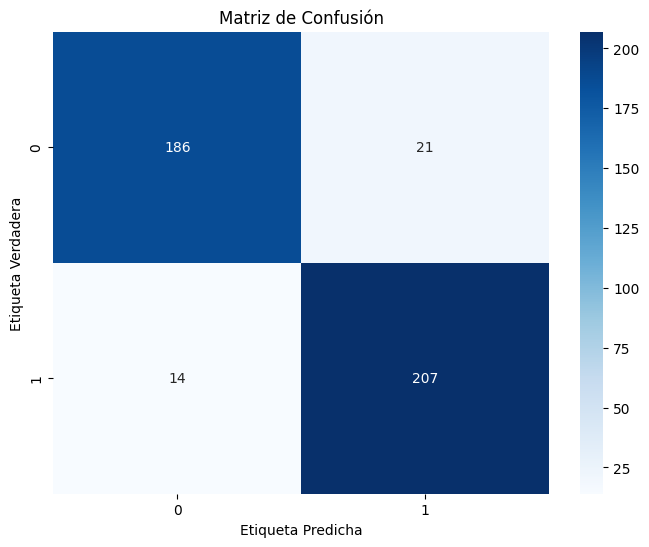

In [ ]:
# Define el rango de valores para n_neighbors
n = 50  # Supongamos un valor para n
n_neighbors_range = range(1, n)
# Inicializar variables para almacenar los 10 mejores resultados
top_10_scores = []
top_10_params = []
# Configurar y ejecutar la búsqueda de cuadrícula con validación cruzada para cada valor de n_neighbors
for n_neighbors in n_neighbors_range:
    param_grid = {
        'n_neighbors': [n_neighbors],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtener los mejores parámetros y la mejor puntuación
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Guardar los resultados si son uno de los 10 mejores
    if len(top_10_scores) < 10:
        top_10_scores.append(best_score)
        top_10_params.append(best_params)
    else:
        min_score_index = top_10_scores.index(min(top_10_scores))
        if best_score > top_10_scores[min_score_index]:
            top_10_scores[min_score_index] = best_score
            top_10_params[min_score_index] = best_params
# Entrenar el mejor modelo con los mejores parámetros encontrados
best_params = top_10_params[0]  # Usamos los mejores parámetros encontrados durante la búsqueda de cuadrícula
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = knn.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

En 207 casos el valor predicho coincide con el valor verdadero, por lo que clasifica que padece la enfermedad. En los otros 186 también coincide y  clasifica que no padece la enfermedad.

Un total de 35 (14+21) casos la etiqueta predicha no coincide con la etiqueta verdadera, un valor bastante pequeño en comparación con lo valores que coinciden.

También se puede implementar el método del codo para determinar el número óptimo de vecinos, veamoslo con un ejemplo.

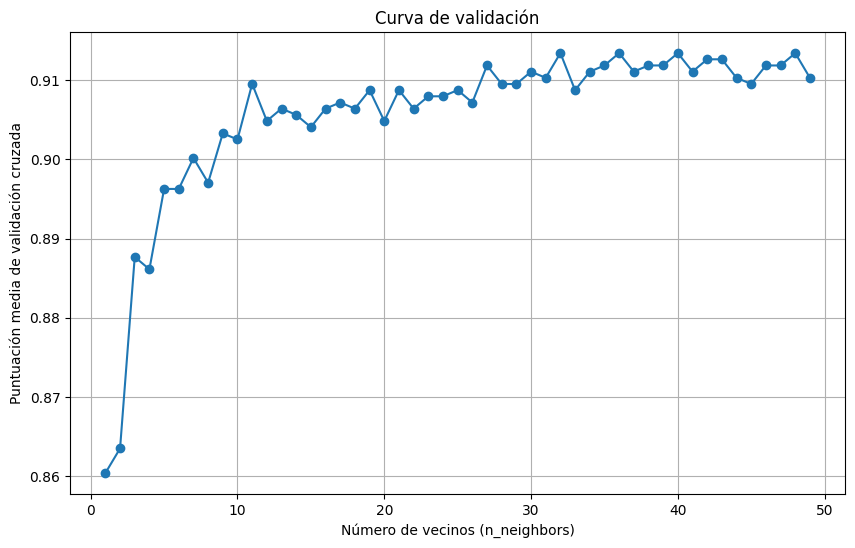

In [ ]:
# Método del codo
plt.figure(figsize=(10, 6))
# Inicializar una lista para almacenar las puntuaciones medias de validación cruzada
mean_scores = []
# Inicializar una lista para almacenar los valores de k
k_values = []
# Calcular las puntuaciones medias para cada valor de n_neighbors
for n_neighbors in n_neighbors_range:
    param_grid = {
        'n_neighbors': [n_neighbors],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    mean_scores.append(grid_search.best_score_)
    k_values.append(n_neighbors)
# Graficar los resultados
plt.plot(k_values, mean_scores, marker='o')
plt.title('Curva de validación')
plt.xlabel('Número de vecinos (n_neighbors)')
plt.ylabel('Puntuación media de validación cruzada')
plt.grid(True)
plt.show()

Cuando el puntaje de precisión (accuracy) sigue subiendo y luego se estabiliza en un punto, esto puede indicar el punto en el que el modelo alcanza su mejor rendimiento en el conjunto de datos de validación

Para determinar el valor óptimo de k en esta situación, puedes considerar dos enfoques comunes:

- Elegir el valor de k donde el puntaje de precisión alcanza su máximo

Si elegimos el valor de k elgiendo el máximo de la precisión de la gráfica, el valor de k sería un valor cercano a 50.

- Elegir el valor de k donde hay un equilibrio entre el rendimiento y la complejidad del modelo. Observa el punto en el que el puntaje de precisión comienza a estabilizarse. Elegir un valor de k en este punto puede proporcionar un buen equilibrio entre rendimiento y complejidad del modelo. Un valor de k demasiado bajo puede llevar a un sobreajuste (alta varianza), mientras que un valor de k demasiado alto puede llevar a un subajuste (alta sesgo).

Si elegimos el valor de k cuando el modelo de estabiliza, el valor de k sería a partir de 30.